In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [69]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [70]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [71]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [72]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [73]:
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [74]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [75]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [76]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [77]:
string_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [78]:
df[col]

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [79]:
df.churn = (df.churn == 'yes').astype(int)

In [80]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [83]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [84]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33,random_state=11)

In [85]:
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

#### Exploratory Data Analysis

In [86]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [87]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [88]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
'phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection',
'techsupport', 'streamingtv', 'streamingmovies',
'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [89]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### Feature Importance

###### Churn Rate

In [90]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female', round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male', round(male_mean, 3))

gender == female 0.277
gender == male 0.263


###### we see that the churn rate of female customers is 27.7% and that of male customers is 26.3%, whereas the global churn rate is 27%

In [91]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes', round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no', round(partner_no, 3))

partner == yes 0.205
partner == no 0.33


###### As we see, the rates for those who have a partner are quite different from rates for those who don’t: 20% and 33%, respectively. It means that clients with no partner are more likely to churn than the ones with a partner

###### Risk Ratio

In [92]:
global_mean = df_train_full.churn.mean()
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [93]:
from IPython.display import display
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


#### Feature Engineering

###### One-hot encoding for categorical variables

In [94]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 71,
  'monthlycharges': 86.1,
  'totalcharges': 6045.9},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 60,
  'monthlycharges': 100.5,
  'totalcharges': 6029.0},
 {'gender':

In [95]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [96]:
X_train = dv.transform(train_dict)

X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [97]:
dv.get_feature_names()

C:\Users\O.I. ORIMOOGUNJE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

#### Machine Learning for Classification

###### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression(solver = 'liblinear', random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [100]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [101]:
y_pred = model.predict_proba(X_val)

In [102]:
y_pred

array([[0.76509203, 0.23490797],
       [0.73114243, 0.26885757],
       [0.68054933, 0.31945067],
       ...,
       [0.9427494 , 0.0572506 ],
       [0.38477113, 0.61522887],
       [0.93872737, 0.06127263]])

In [103]:
y_pred[:, 1]

array([0.23490797, 0.26885757, 0.31945067, ..., 0.0572506 , 0.61522887,
       0.06127263])

###### we wanted to retain customers by identifying those who are about to cancel their contract with the company and send them promotional messages, offering discounts and other benefits. We do this in the hope that after receiving the benefit, they will stay with the company. On the other hand, we don’t want to give promotions to all our customers, because it will hurt us financially: we will make less profit, if any

###### To make the actual decision about whether to send a promotional letter to our customers, using the probability alone is not enough. We need hard predictions — binary values of True (churn, so send the mail) or False (not churn, so don’t send the mail). To get the binary predictions, we take the probabilities and cut them above a certain threshold. If the probability for a customer is higher than this threshold, we predict churn, otherwise, not churn. If we select 0.5 to be this threshold, making the binary predictions is easy. We just use the “>=” operator:

In [104]:
churn = y_pred >= 0.5

#### Model Interpretation

In [105]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\O.I. ORIMOOGUNJE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


#### Using the Model

In [106]:
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

###### First, we convert this dictionary to a matrix by using the DictVectorizer:

In [107]:
X_test = dv.transform([customer])

In [108]:
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [109]:
model.predict_proba(X_test)

array([[0.92667596, 0.07332404]])

###### All we need from the matrix is the number at the first row and second column: the probability of churning for this customer. To select this number from the array, we use the brackets operator:

In [110]:
model.predict_proba(X_test)[0, 1]

0.07332403595205103

###### the probability that this customer will churn is only 7%. It’s less than 50%, so we will not send this customer a promotional mail. We can try to score another client:

In [111]:
customer = {
'gender': 'female',
'seniorcitizen': 1,
'partner': 'no',
'dependents': 'no',
'phoneservice': 'yes',
'multiplelines': 'yes',
'internetservice': 'fiber_optic',
'onlinesecurity': 'no',
'onlinebackup': 'no',
'deviceprotection': 'no',
'techsupport': 'no',
'streamingtv': 'yes',
'streamingmovies': 'no',
'contract': 'month-to-month',
'paperlessbilling': 'yes',
'paymentmethod': 'electronic_check',
'tenure': 1,
'monthlycharges': 85.7,
'totalcharges': 85.7
}

In [112]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321645264352351

###### The output of the model is 83% likelihood of churn, so we should send this client a promotional mail in the hope of retaining them.

# Evaluation Metrics for Classification

### Classification Accuracy

###### The accuracy of a binary classification model is the percentage of correct predictions it makes

In [113]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

0.8016129032258065

In [114]:
churn

array([False, False, False, ..., False,  True, False])

In [115]:
y_pred

array([0.23490797, 0.26885757, 0.31945067, ..., 0.0572506 , 0.61522887,
       0.06127263])

###### The first thing we should ask ourselves is why we chose 0.5 as the threshold and not any other number. That was an arbitrary choice, but it’s actually not difficult to check other thresholds as well: we can just loop over all possible threshold candidates and compute the accuracy for each. Then we can choose the one with the best accuracy score.

In [116]:
from sklearn.metrics import accuracy_score

###### Now we can loop over different thresholds and check which one gives the best accuracy:

In [117]:
thresholds = np.linspace(0, 1, 11)
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


###### To make it more visual, we can use Matplotlib to create a plot that shows how accuracy changes depending on the threshold. We repeat the same process as previously, but instead of just printing the accuracy scores, we first put the values to a list:

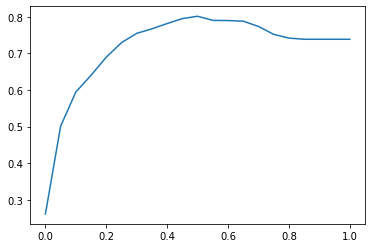

In [118]:
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    
plt.plot(thresholds, accuracies)

### Confusion Table

In [119]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)
true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

In [120]:
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

In [121]:
true_positive = (predict_churn & actual_churn).sum()

In [122]:
confusion_table = np.array(
[[true_negative, false_positive],
[false_negative, true_positive]])

In [123]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

<AxesSubplot:>

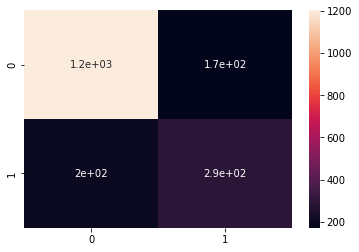

In [124]:
sns.heatmap(confusion_table, annot=True)

###### We see that the model predicts negative values quite well: 65% of the predictions are true negatives. However, it makes quite a few mistakes of both types: the number of false positives and false negatives is roughly equal (9% and 11%, respectively)

#### accuracy = (TN + TP) / (TN + TP + FN + FP)

### Precision and Recall

###### As already mentioned, accuracy can be misleading when dealing with imbalanced datasets such as ours. Other metrics are helpful to use for such cases: precision and recall.

###### Both precision and recall are calculated from the values of the confusion table. They both help us understand the quality of the model in cases of class imbalance.

###### The precision of a model tells us how many of the positive predictions turned out to be correct. It’s the fraction of correctly predicted positive examples. In our case, it’s the number of customers who actually churned (TP) out of all the customers we thought would churn

###### P = TP / (TP + FP)

###### For our model, the precision is 62%: 
######                                   P = 289 / (289 + 172) = 172 / 461 = 0.62

###### Recall is the fraction of correctly classified positive examples among all positive examples. In our case, to calculate recall we first look at all the customers who churned and see how many of them we managed to identify correctly.

###### The formula for calculating recall is
###### R = TP / (TP + FN)

###### For our model, the recall is 59%:
###### R = 286 / (289 + 197) = 289 / 486 = 0.59

#### The goal of our project is to identify customers who are likely to churn. Once we do, we can send them promotional messages in the hopes that they’ll change their mind. When doing this, we make two types of mistakes:
####  We accidentally send messages to people who weren’t going to churn — these people are the false positives of the model.
####  We also sometimes fail to identify people who are actually going to churn. We don’t send messages to these people — they are our false negatives.

###### Precision and recall help us quantify these errors. 

###### Precision helps us understand how many people received a promotional message by mistake. The better the precision, the fewer false positives we have. The precision of 62% means that 62% of the reached customers indeed were going to churn (our true positives), whereas the remaining 38% were not (false positives).

###### Recall helps us understand how many of the churning customers we failed to find. The better the recall, the fewer false negatives we have. The recall of 59% means that we reach only 59% of all churning users (true positives) and fail to identify the remaining 41% (false negatives).

###### As we can see, in both cases, we don’t really need to know the number of true negatives: even though we can correctly identify them as not churning, we aren’t going to do anything with them.

###### Although the accuracy of 80% might suggest that the model is great, looking at its precision and recall tells us that it actually makes quite a few errors. This is typically not a deal-breaker: with machine learning it’s inevitable that models make mistakes, and at least now we have a better and more realistic understanding of the performance of our churn-prediction model. Precision and recall are useful metrics, but they describe the performance of a classifier only at a certain threshold. Often it’s useful to have a metric that summarizes the performance of a classifier for all possible threshold choices.

### ROC curve and AUC score

##### ROC - Receiver Operating Characteristic

###### We need two metrics for ROC curves: TPR and FPR, or true positive rate and false positive rate.

######  False positive rate (FPR): the fraction of false positives among all negative examples
######  True positive rate (TPR): the fraction of true positives among all positive examples

###### Like precision and recall, these values are based on the confusion matrix. We can calculate them using the following formulas:
##### FPR = FP / (FP + TN)
###### TPR = TP / (TP + FN)

######  For FPR, we look at the first row of the table: the fraction of false positives among all negatives.
######  For TPR, we look at the second row of the table: the fraction of true positives among all positives.

### Evaluating a Model at Multiple Thresholds

###### Binary classification models, such as logistic regression, typically output a probability — a score between zero and one. To make actual predictions, we binarize the output by setting some threshold to get only True and False values. 

In [125]:
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [126]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [127]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,486,1374,0,0
1,0.01,483,1190,3,184
2,0.02,481,1074,5,300
3,0.03,478,1011,8,363
4,0.04,478,970,8,404
...,...,...,...,...,...
96,0.96,0,0,486,1374
97,0.97,0,0,486,1374
98,0.98,0,0,486,1374
99,0.99,0,0,486,1374


###### Now we can compute the TPR and FPR scores. Because the data is now in a dataframe, we can do it for all the values at once:


In [128]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [129]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,486,1374,0,0,1.000000,1.000000
1,0.01,483,1190,3,184,0.993827,0.866084
2,0.02,481,1074,5,300,0.989712,0.781659
3,0.03,478,1011,8,363,0.983539,0.735808
4,0.04,478,970,8,404,0.983539,0.705968
...,...,...,...,...,...,...,...
96,0.96,0,0,486,1374,0.000000,0.000000
97,0.97,0,0,486,1374,0.000000,0.000000
98,0.98,0,0,486,1374,0.000000,0.000000
99,0.99,0,0,486,1374,0.000000,0.000000


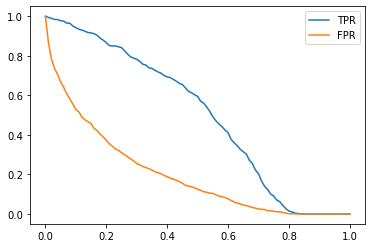

In [130]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

###### Both TPR and FPR start at 100% — at the threshold of 0.0, we predict “churn” for everyone:
######  FPR is 100% because we have only false positives in the prediction. There are no true negatives: nobody is predicted as non-churning.
######  TPR is 100% because we have only true positives and no false negatives.

###### As the threshold grows, both metrics decline but at different rates. Ideally, FPR should go down very quickly. A small FPR indicates that the model makes very few mistakes predicting negative examples (false positives).

## Parameter Tuning

##### K-FOLD Cross Validation

###### Training the model

In [131]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    return dv, model

###### Aplying model to new data

In [132]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

###### Implementing k-fold validation

In [133]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
aucs = []
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)
    

######  n_splits = 10: That’s K, which specifies the number of splits.
######  shuffle = True: We ask it to shuffle the data before splitting it.
######  random_state = 1: Because there’s randomization in the process (shuffling data), we want the results to be reproducible, so we fix the seed for the randomnumber generator.

In [134]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


#### Finding the Best Parameters

###### function for training the model with parameter C for controliing regularization

In [135]:
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    return dv, model


###### Tuning the model: selecting the best parameter C using cross-validation

In [136]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
   
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


###### What we see is that after C = 0.1, the average AUC is the same and doesn’t grow anymore.
######  However, the standard deviation is smaller for C = 0.5 than for C = 0.1, so we should use that. The reason we prefer C = 0.5 to C = 1 and C = 10 is simple: when the C parameter is small, the model is more regularized. The weights of this model are more restricted, so in general, they are smaller. Small weights in the model give us additional assurance that the model will behave well when we use it on real data. So we select C = 0.5.

###### Now we need to do the last step: train the model on the entire train and validation datasets and apply it to the test dataset to verify it indeed works well. Let’s use our train and predict functions for that:

In [137]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc) 

auc = 0.858


###### When we execute the code, we see that the performance of the model (AUC) on the held-out test set is 0.858.
###### That’s a little higher than what we had on the validation set, but that’s not an issue;
###### it could happen just by chance. What’s important is that the score is not significantly different from the validation score.
###### Now we can use this model for scoring real customers and think about our marketing campaign for preventing churn

# DEPLOYING THE MODEL

###### Using the model

In [138]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

###### To predict whether this customer is going to churn, we can use the predict function we wrote earlier:

In [140]:
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
y_pred[0]


array([0.05960567])

###### This means that this customer has a 6% probability of churning.

######  Now let’s take a look at the predict function, which we wrote previously for applying the model to the customers in the validation set:

In [69]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='rows')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

###### Using it for one customer seems inefficient and unnecessary: we create a dataframe from a single customer only to convert this dataframe back to a dictionary later inside predict.
###### To avoid doing this unnecessary conversion, we can create a separate function for predicting the probability of churn for a single customer only. Let’s call this function predict_single:

In [65]:
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [141]:
predict_single(customer, dv, model)

0.05960567280188668

### Using Pickle to save and load the model

###### To be able to use it outside of our notebook, we need to save it, and then later, another process can load and use it

In [72]:
import pickle

In [73]:
with open('churn-model.bin', 'wb') as f_out:
    pickle.dump(model, f_out)

###### In our case, however, saving just the model is not enough: we also have a DictVectorizer that we “trained” together with the model. We need to save both. The simplest way of doing this is to put both of them in a tuple when pickling:

In [74]:
with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out) 


##### Loading the Model

In [75]:
with open('churn-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)        #it loads the tuple and also unpacks it, since we savd it as a tuple in the first place

##### Creating a simple python script that loads the model and applies to a customer

In [76]:
import pickle
import numpy as np

In [77]:
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]


In [78]:
with open('churn-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [79]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

In [80]:
prediction = predict_single(customer, dv, model)

In [81]:
print('prediction: %.3f' % prediction)
if prediction >= 0.5:
    print('verdict: Churn')
else:
    print('verdict: Not churn')

prediction: 0.060
verdict: Not churn


#### Model Serving

###### We want to serve this model, like, make it available for others to use

#### FLASK

###### Basics of FLASK

In [159]:
from flask import Flask

In [160]:
#Suppose we have a simple Python function called ping:
def ping():
    return 'PONG'

###### Now we create a Flask app — the central object for registering functions that need to be exposed in the web service. We’ll call our app test:

In [161]:
app = Flask('test')

###### Next, we need to specify how to reach the function by assigning it to an address, or a route in Flask terms. In our case, we want to use the /ping address: